# Reg.No.: 21MIS1044
## Name: Srinivasan JP

Given : Develop a Model to predict the value of Chance of Admit in the given dataset
named as Admission.csv and write your observations and inferences

**Model choosen: Multiple linear regression**   



**Data set : Admission.csv**

In [16]:
#imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

Data set is readed and the the dataframes are created

In [17]:
df = pd.read_csv('./Admission.csv')
df.columns = ['Serial No.','GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit']
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


## Pre processing the dataset to adoupt the models


In [18]:
df = df.drop(['Serial No.'], axis=1)
df.isnull().sum()


GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

Describing after cleaning process 

In [19]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


**Ploting the feature to get the clear analysis**

<Figure size 1400x2100 with 0 Axes>

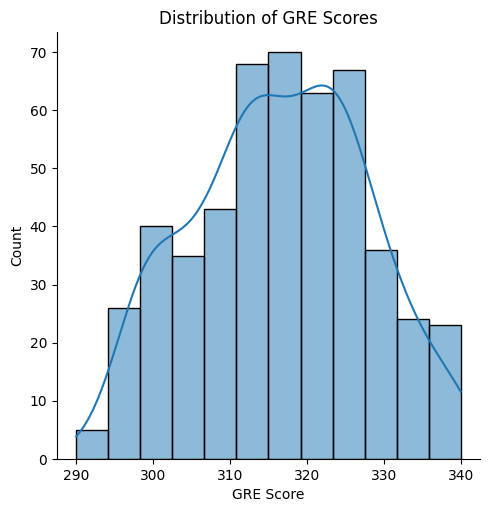

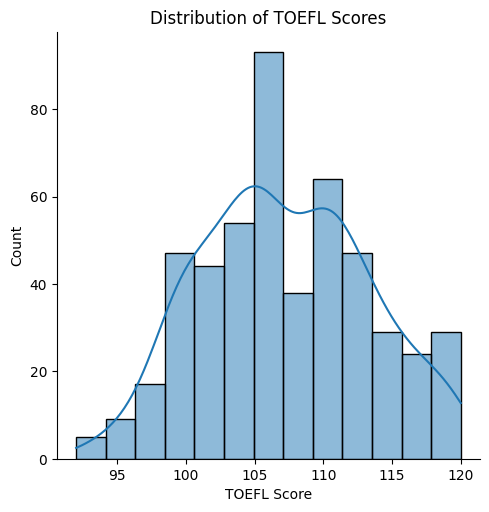

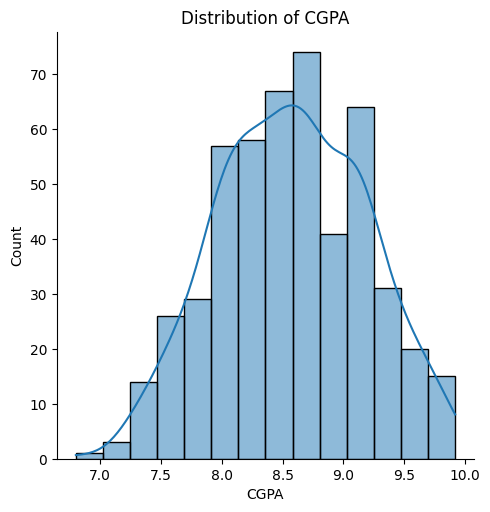

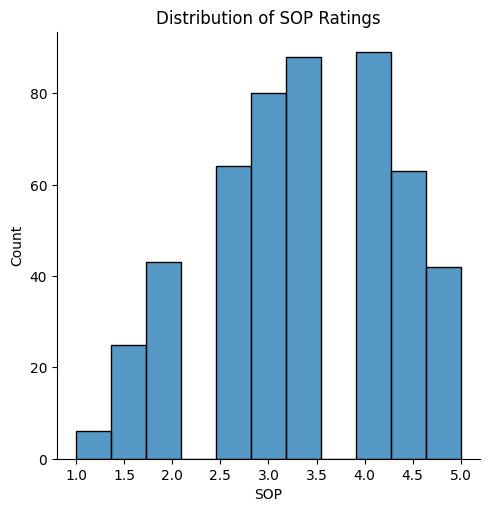

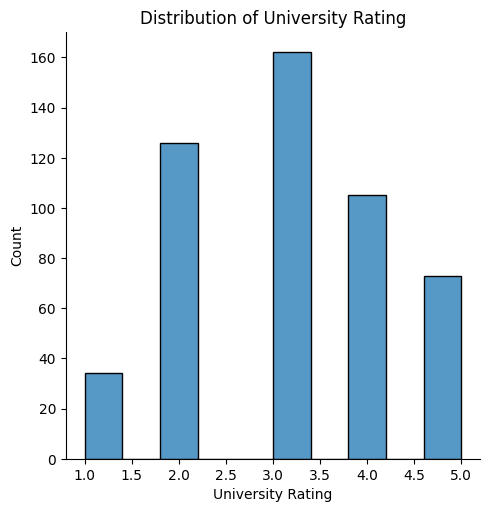

In [20]:
fig = plt.figure(figsize=(14, 21))
sns.displot(df['GRE Score'], kde=True)
plt.title("Distribution of GRE Scores")

sns.displot(df['TOEFL Score'], kde=True)
plt.title("Distribution of TOEFL Scores")

sns.displot(df['CGPA'], kde=True)
plt.title("Distribution of CGPA")

sns.displot(df['SOP'], kde=False)
plt.title("Distribution of SOP Ratings")

sns.displot(df['University Rating'], kde=False)
plt.title("Distribution of University Rating")

plt.show()

Since we are going to use the multiple linear regression the correlation is the main parameter to consider so the correlation is calculated and ploted 

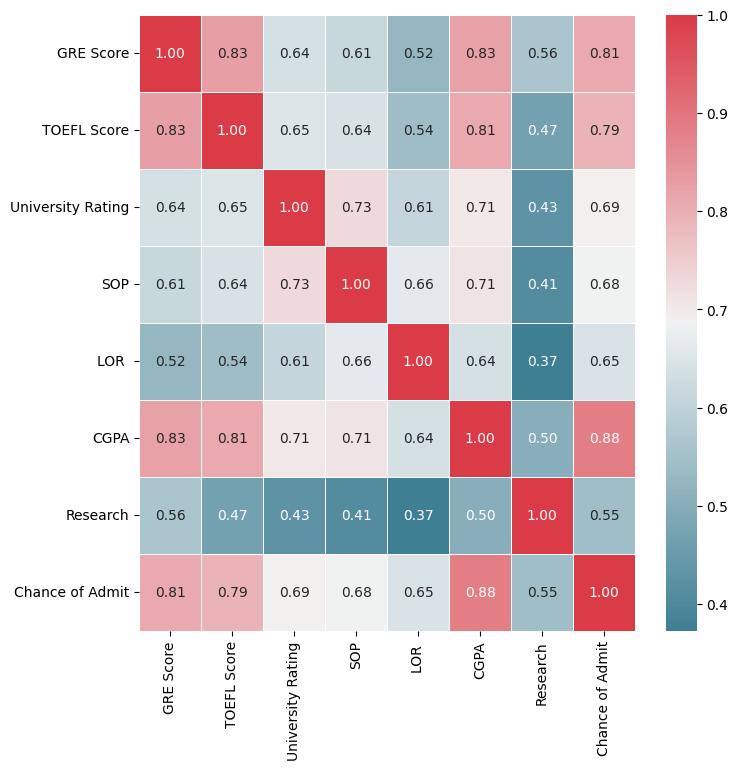

In [21]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(8, 8))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, linewidths=.5, annot=True, fmt=".2f")
plt.show()

# The model traning begins


The test data size is splitted to 20% and the train data is 80% are splitted from the dataset 

In [22]:

X_train, X_test, Y_train, Y_test = train_test_split(df.iloc[:,:-1],df.iloc[:,-1],test_size = 0.20, shuffle=False)

The Linear Regression is imported form the sklearn is used to train the model

In [23]:
lr = LinearRegression()
lr.fit(X_train,Y_train)
print("Multiple linearRegression model is trained successfully")

Multiple linearRegression model is trained successfully


In [24]:
pred = lr.predict(X_test)

We are going to test the trained model with the test dataset

The actual value and the predicted values are compared using the scatter plot

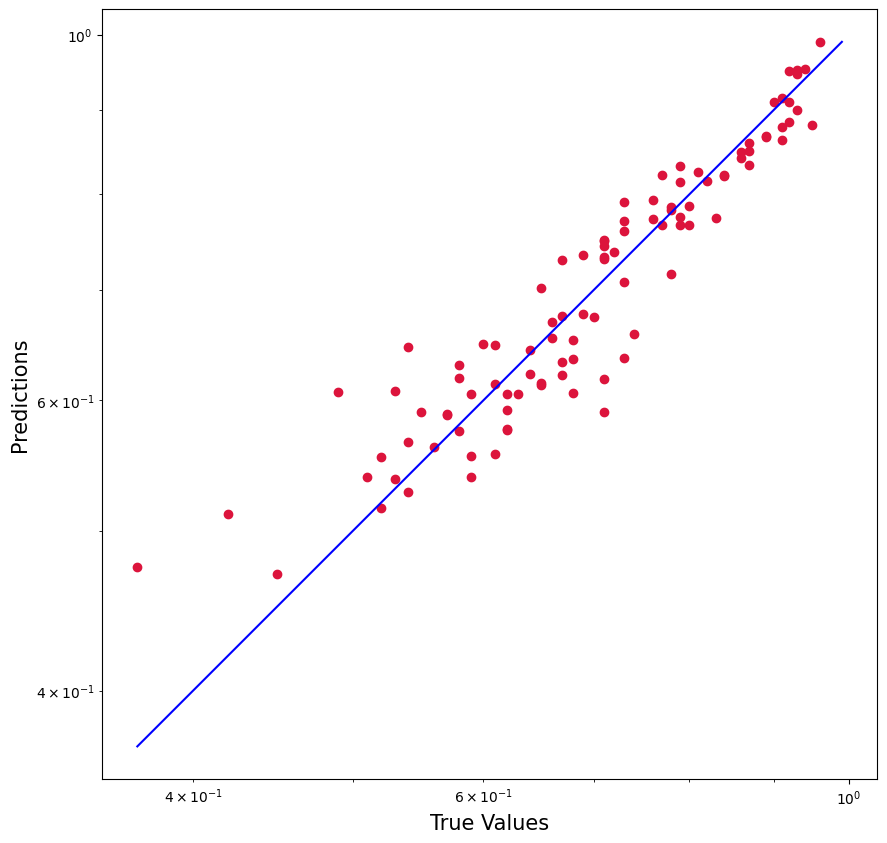

In [25]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test, pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(Y_test), max(pred))
p2 = min(min(Y_test), min(pred))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

# comparing with other models

training with the all the sutable model and calculate the mean squared error to validate the modle choice

In [26]:

models =[['Linear Regression', LinearRegression()],
           ['Random Forest',RandomForestRegressor()],
           ['K-Neighbours', KNeighborsRegressor(n_neighbors = 2)],
           ['SVM', SVR()]]

model_output = {}
for name,model in models:
    model = model
    model.fit(X_train, Y_train)
    pred = model.predict(X_test)
    model_output[f'{name}'] = np.sqrt(mean_squared_error(Y_test, pred))

results = pd.DataFrame(model_output.items())
results.columns = ['Model', 'RMSE']
results.index = np.arange(1,len(results)+1)
results = results.sort_values(by=['RMSE'], ascending=True)
print("Models Trained")

Models Trained


Printing the models mean squared error value respectivily

In [27]:
for model in model_output:
    print(F"Used model {model} the mean squared error is {model_output[model]}")

Used model Linear Regression the mean squared error is 0.04293220746251859
Used model Random Forest the mean squared error is 0.050600081027603105
Used model K-Neighbours the mean squared error is 0.06980687645210894
Used model SVM the mean squared error is 0.07329997552068897


Ploting the mean squared error

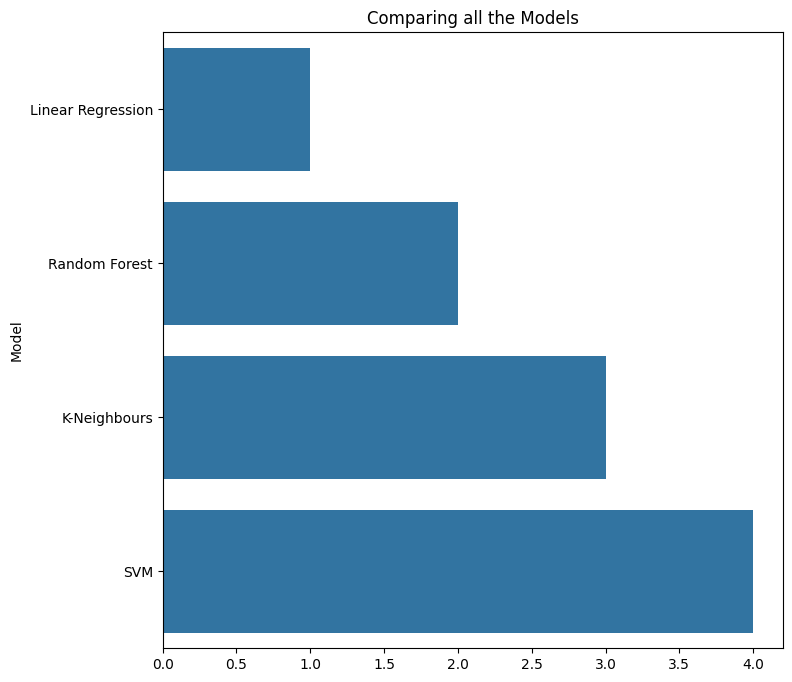

In [28]:
fig = plt.figure(figsize=(8, 8))
sns.barplot(results['Model'])
plt.title("Comparing all the Models")
plt.show()

To find the important feature in the dataset we can use Random Forest Regressor

In [29]:
model = RandomForestRegressor()
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]
model.fit(X,Y)
feature_names = X.columns
features = pd.DataFrame()
features['Features'] = X.columns
features['Importance'] = model.feature_importances_
features = features.sort_values(by=['Importance'], ascending=False)
features.index = np.arange(1,len(X.columns)+1)

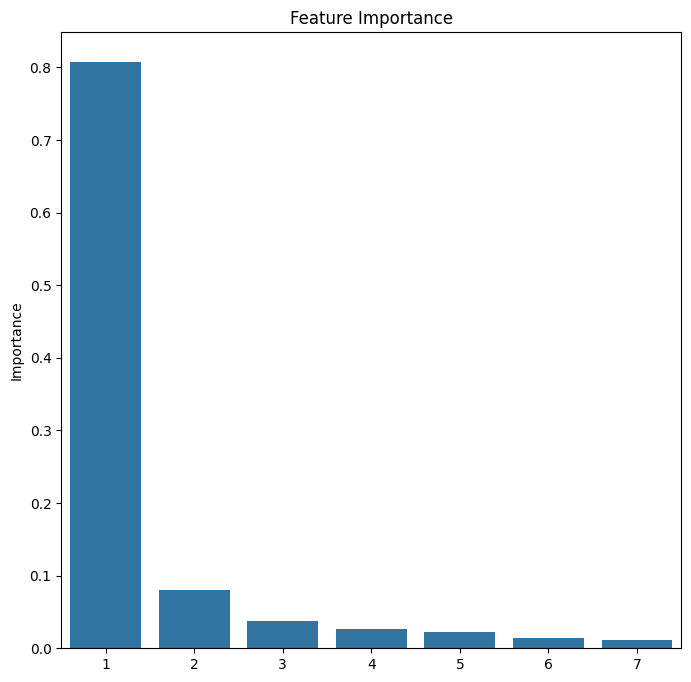

In [30]:
fig = plt.figure(figsize=(8, 8))
sns.barplot(features['Importance'])
plt.title("Feature Importance")
plt.show()